# Comparison of Machine Learning Classification Algorithms on Synthetic Data

## Objective

The purpose of this notebook is to compare the performance of several classification algorithms using synthetic datasets generated with sklearn.

The classifiers evaluated include:

- Naive Bayes
- Logistic Regression
- Quadratic Discriminant Analysis (QDA)
- Support Vector Machine (RBF kernel)
- Decision Tree
- K-Nearest NeigIors (K=1)

We will create four synthetic datasets with different characteristics to observe how each classifier performs under different conditions.

Each dataset will be split into training and testing sets. We will evaluate performance using classification reports and visualizations of decision boundaries.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

I import all necessary libraries for data generation, visualization, model training, and evaluation.

## Dataset 1: Well-Separated Blobs

This dataset contains two clearly separated classes. All classifiers should perform very well on this dataset.

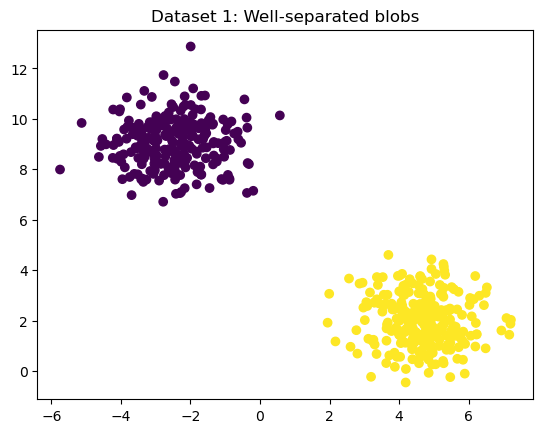

In [39]:
X1, y1 = make_blobs(
    n_samples=500,
    centers=2,
    n_features=2,
    cluster_std=1.0,
    random_state=42
)

plt.scatter(X1[:,0], X1[:,1], c=y1)
plt.title("Dataset 1: Well-separated blobs")
plt.show()

## Training and Testing Split

I split the dataset into training and testing sets to evaluate performance properly.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.3, random_state=42
)

In [47]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "SVM RBF": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN (k=1)": KNeighborsClassifier(n_neighbors=1)
}

In [49]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    print(f"--- {name} ---")

    print("Training Performance:")
    print(classification_report(y_train, clf.predict(X_train)))

    print("Testing Performance:")
    print(classification_report(y_test, clf.predict(X_test)))

    print()

--- Naive Bayes ---
Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       170

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

Testing Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        80

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


--- Logistic Regression ---
Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       170

    accuracy                           1.00       350
   macro avg  

## Dataset 2: Nonlinear Circular Data

This dataset consists of two concentric circles. This creates a nonlinear decision boundary.

Logistic Regression, which creates linear decision boundaries, should perform poorly.

Quadratic Discriminant Analysis (QDA), SVM with RBF kernel, Decision Tree, and KNN should perform much better.

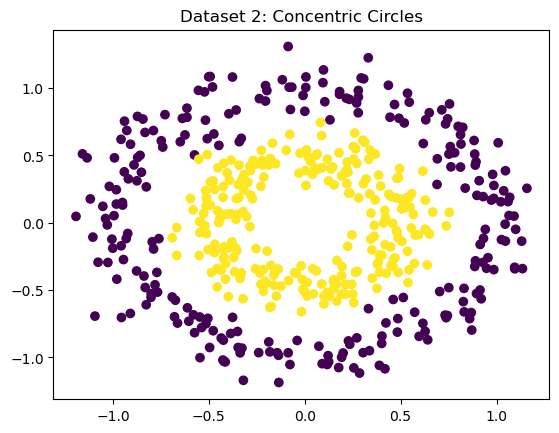

In [52]:
from sklearn.datasets import make_circles

X2, y2 = make_circles(
    n_samples=500,
    noise=0.1,
    factor=0.5,
    random_state=42
)

plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=y2)
plt.title("Dataset 2: Concentric Circles")
plt.show()

## Training and Evaluation on Dataset 2

I split the dataset into training and testing sets and evaluate all classifiers.

I expect Logistic Regression to perform poorly due to the nonlinear boundary.

In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=42
)

for name, clf in classifiers.items():

    clf.fit(X2_train, y2_train)

    print(f"=== {name} ===")

    print("Training Performance:")
    print(classification_report(y2_train, clf.predict(X2_train)))

    print("Testing Performance:")
    print(classification_report(y2_test, clf.predict(X2_test)))

    print()

=== Naive Bayes ===
Training Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       175
           1       0.99      0.96      0.98       175

    accuracy                           0.98       350
   macro avg       0.98      0.98      0.98       350
weighted avg       0.98      0.98      0.98       350

Testing Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.95      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


=== Logistic Regression ===
Training Performance:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       175
           1       0.51      0.53      0.52       175

    accuracy                           0.51       350
   macro avg  

## Dataset 3: Overfitting Example Using Noisy Moon Data

In this example, I created a dataset using the `make_moons` function with added noise. The purpose of this dataset is to observe how some classifiers behave when the data is more complex and noisy.

Because the dataset contains noise, some classifiers like Decision Tree and KNN may try to memorize the training data instead of learning general patterns. This can lead to overfitting, where the model performs very well on the training data but poorly on the testing data.

On the other hand, simpler models like Logistic Regression may not fit the training data perfectly, but they can sometimes generalize better to new, unseen data.

This example helps me understand the difference between fitting the training data and generalizing to the testing data.

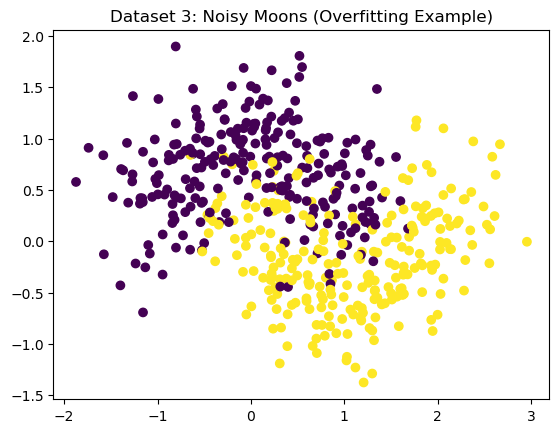

In [59]:
from sklearn.datasets import make_moons

X3, y3 = make_moons(
    n_samples=500,
    noise=0.35,
    random_state=42
)

plt.figure()
plt.scatter(X3[:,0], X3[:,1], c=y3)
plt.title("Dataset 3: Noisy Moons (Overfitting Example)")
plt.show()

## Training and Testing Evaluation on Dataset 3

In this step, I split the dataset into training and testing sets. I trained each classifier using only the training data and then evaluated the performance on both the training and testing data.

This allows me to see whether a model is overfitting. If a model performs extremely well on the training data but significantly worse on the testing data, this is a sign of overfitting.

I expect that Decision Tree and KNN may overfit this dataset because they can create very complex decision boundaries that closely follow the noise in the training data.

This experiment helps me better understand how different classifiers behave when the data is noisy.

In [62]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.3, random_state=42
)

for name, clf in classifiers.items():

    clf.fit(X3_train, y3_train)

    print(f"=== {name} ===")

    print("Training Performance:")
    print(classification_report(y3_train, clf.predict(X3_train)))

    print("Testing Performance:")
    print(classification_report(y3_test, clf.predict(X3_test)))

    print()

=== Naive Bayes ===
Training Performance:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       175
           1       0.84      0.83      0.84       175

    accuracy                           0.84       350
   macro avg       0.84      0.84      0.84       350
weighted avg       0.84      0.84      0.84       350

Testing Performance:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150


=== Logistic Regression ===
Training Performance:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       175
           1       0.84      0.83      0.84       175

    accuracy                           0.84       350
   macro avg  

## Dataset 4: Complex Nonlinear Structure Favoring SVM and KNN

In this final example, I constructed a more complex nonlinear dataset by combining moon-shaped data with additional randomness. 

The goal of this dataset is to create a structure where models that can handle nonlinear decision boundaries perform better.

I expect SVM with an RBF kernel to perform very well because it can create smooth nonlinear decision boundaries. I also expect KNN to perform well since it makes predictions based on local neighborhoods.

On the other hand, simpler linear models like Logistic Regression should struggle because they cannot represent curved boundaries effectively.

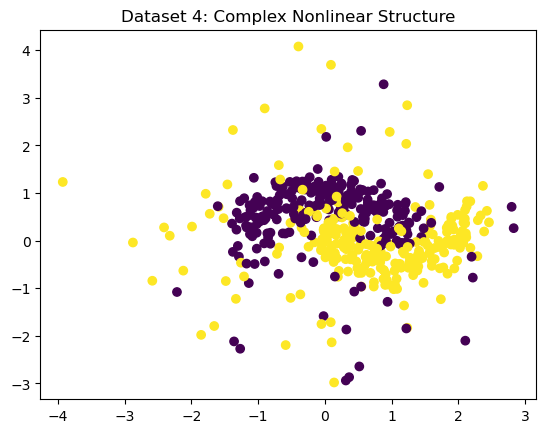

In [65]:
# Generate base moon data
X4_base, y4_base = make_moons(
    n_samples=400,
    noise=0.25,
    random_state=42
)

# Add some additional Gaussian noise points
np.random.seed(42)
extra_noise = np.random.normal(scale=1.5, size=(100, 2))
extra_labels = np.random.randint(0, 2, 100)

# Combine datasets
X4 = np.vstack([X4_base, extra_noise])
y4 = np.hstack([y4_base, extra_labels])

plt.figure()
plt.scatter(X4[:,0], X4[:,1], c=y4)
plt.title("Dataset 4: Complex Nonlinear Structure")
plt.show()

## Training and Testing Evaluation on Dataset 4

In this final evaluation, I split the dataset into training and testing sets. 

Because the dataset has a complex nonlinear structure, I expect SVM (RBF) and KNN to achieve better testing performance compared to the other classifiers.

This dataset highlights the advantage of flexible nonlinear classifiers when the decision boundary is complex.

In [68]:
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X4, y4, test_size=0.3, random_state=42
)

for name, clf in classifiers.items():

    clf.fit(X4_train, y4_train)

    print(f"=== {name} ===")

    print("Training Performance:")
    print(classification_report(y4_train, clf.predict(X4_train)))

    print("Testing Performance:")
    print(classification_report(y4_test, clf.predict(X4_test)))

    print()

=== Naive Bayes ===
Training Performance:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       172
           1       0.75      0.72      0.74       178

    accuracy                           0.74       350
   macro avg       0.74      0.74      0.74       350
weighted avg       0.74      0.74      0.74       350

Testing Performance:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71        71
           1       0.76      0.63      0.69        79

    accuracy                           0.70       150
   macro avg       0.71      0.70      0.70       150
weighted avg       0.71      0.70      0.70       150


=== Logistic Regression ===
Training Performance:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       172
           1       0.77      0.75      0.76       178

    accuracy                           0.76       350
   macro avg  